Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). On JupyterLab, you may want to hit the "Validate" button as well.

Caution: do not mess with the notebook's metadata; do not change a pre-existing cell's type; do not copy pre-existing cells (add new ones with the + button instead). This will break autograding; you will get a 0; you are warned.

<table style="width: 100%; border: none;" cellspacing="0" cellpadding="0" border="0">
  <tr>
    <td><img src="https://www.planetegrandesecoles.com/wp-content/uploads/2021/07/Identite%CC%81-visuelle-Plane%CC%80te-BAC-8-600x398.png" style="float: left; width: 100%" />
</td>
    <td><h1 style="text-align: center; vertical-align: middle;"><a href="https://moodle.polytechnique.fr/course/view.php?id=15585">[CSE204-2022] - Introduction to Machine Learning</a></h1>
</td>
  </tr>
</table>

---

# Lab Session 5 - Exam #1

Théo Lacombe - Adrien Ehrhardt - Jesse Read

## Overall presentation

This lab is composed of 10 exercises, granting various amounts of points (up to 100 points in total), specified in their respective header.

These exercises are independant.

There are examples of automatic tests that are run against your code. **They are not exhaustive nor sufficient** (we will run other - hidden - tests), **but they are necessary**: they have to pass, otherwise you can be sure *not* to get the points.

Some help and hints are provided for each question (e.g. which function to use and how), and you can also use the `help(...)` function.

- **Do not** delete any pre-existing cell (you can create and delete your own cells for testing).
- **Do not** change the type (Markdown / Code / ...) of any pre-existing cell.
- Run the notebook on *jupytercloud*, or on your computers or the computers of the computer rooms, after having made sure you have installed the required packages (sent by Jesse on Friday); otherwise, proceed at your own risk.
- **Do not** rename the file when uploading your work on *jupytercloud* or *Moodle*.
- **Do not** edit the notebook's or a cell's metadata.

* Edit the `email` variable (in the following), replacing firstname.lastname as appropriate
* Read these instructions carefully
* This is an individual exam, and any form of communication is not allowed (exception: don't hesitate to ask the teaching coordinators if you have any question!)
* This test is restricted open book: You may have any (but only) of the following pdfs : slides, lecture notes, and 10 pages of your own notes.
* You should attempt to answer all questions. 
* There are 100 points worth of questions (*roughly* estimated in corresponding minutes).
* You can import additional modules, but you shouldn't need to; you can use anything already imported in the next cell.

Hints:

Here is some regularly-used notation:

    X : training instances, of shape (n,p)
    y : training labels, of shape (n,)
    ytrue : true label(s)
    ypred : prediction(s)
    yprob : the [estimated] probability that ytest = 1
    xtest : test point, of shape (1,p)
    Xtest : test point, of shape (n,p)
    theta : weights/parameters/coefficients
    theta_true : ground-truth theta
    E : error function
    eta : learning rate
    alpha : regularization parameter (typically called $\lambda$ in the equations)

and abbreviations:

    wrt : with respect to

* Worth keeping in mind: do not panic! We try to make the test 'just right' but may err towards a bit too difficult. If it looks harder than you were expecting, simply complete as many questions as you can, and don't worry, we can always scale everyone up later. 

In [1]:
# Replace the following email address with your own
email = "erik.dziekonski-bautista@polytechnique.edu"

## Imports

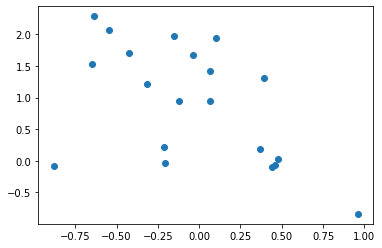

In [2]:
# Import / Functions / Preliminaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, cross_val_score

np.random.seed(123)

## Functions to be used
def generate(n=10, w=np.array([1, -1]), sigma=0.7, x_min=-1, x_max=1):
    """ Generate a regression problem of n instances X,y """ 
    x = x_min + np.random.rand(n) * (x_max - x_min)
    f = w[0] + w[1] * x
    y = f + np.random.randn(n) * sigma
    X = np.vstack([np.ones_like(x), x]).T
    return X, y


def gen_2d_classification_samples(n: int = 20) -> np.array:
    """ Generates a classification dataset """
    y = (np.random.rand(n) >= 0.5) * 1
    X = - np.random.randn(n, 2) * 0.3 + (y.reshape(n, -1) == 1) * 1
    return X, y.astype(int)

X, y = generate(20)
fig = plt.figure()
plt.scatter(X[:, 1], y);

## Framing a Machine Learning Problem + k-Nearest Neighbours (20 points total)

Intro: In the real-world, we're not always lucky enough to have `X` and `y` neatly provided to us. 

Tasks: A meteorological expert comes to you with some equally-spaced temperature measurements (given in the `data` variable below) and asks you to build a forecasting system; informing that predicting the measurement `data[t]` is a function of the 4 previous measurements (`data[t-4:t]`). You should: 
1. Provide `X` and `y` where `X` is of shape `(n-4,4)`, and `y` is of shape `(n-4,)`, where `n` is the length of `data` (since the 4 previous measurements are used as features, we will try to predict the 5th measurement onwards);
2. Answer the kNN 'queries' (in `predictions`, an array of floats/predictions), using the `X, y` you created.

Hint: `X[0,0] = 4`, `y[-1] = 19`.

### 1. Data pre-processing

Answer 1. defined above by creating `X` and `y` consisting respectively in the 4 previous measurements and the current one (that we will try to predict next).

In [3]:
# A bunch of (made-up) temperature meeasurements
data = [4, 7, 8, 9, 3, 7, 8, 6, 4, 5, 5, 3, 0, 10, 5, 1, 2, 6, 0, 1, 9, 19]

# You build a dataset (X,y) that embodies the forecasting problem described above  
p = 4
X = []
y = []
for t, v in enumerate(data[0:-4]):  # (Optional/Hint) 
    X.append(data[t:t+p])
    y.append(data[t+p])

X = np.array(X)
y = np.array(y)

In [4]:
assert X.shape == (len(data) - 4, 4)
assert y.shape == (len(data) - 4,)

### 2. Predictions

Complete the following `pred` function which should predict the value of `y` for `xtest`, a single test samples, as given by a kNN algorithm.

*Hint*: you may use `KNeighborsRegressor`.

In [5]:
def pred(X, y, xtest, k=5):
    '''
        return ypred = f(xtest)
        n.b. xtest is of shape (p,) i.e. a single test point
        n.b. ypred is a float
    '''
    # Change xtest to shape (1,p)
    xtest = xtest.reshape(1, -1)
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X,y)
    ypred = model.predict(xtest)
    return ypred

In [6]:
xtest = np.array(X[3])
assert (np.abs(pred(X, y, xtest) - 4.5) < 0.1)

## A Few Quick Questions (6 points)

Intro: k-nearest neighbours and linear regression are two fundamental building blocks in machine learning. It's important to have some intuitions of how they behave.

Task: In the following Python dictionaries, change all values of `None` to either `True` or `False`, to match the corresponding key.

Hint: The #comment within each one may contain important information affecting the answer

### Question A.

Regarding kNN, for a test set of 50 training pairs, given a traning set of n = 100 training pairs:

In [7]:
answers_to_questions_a = {
    "if k = 100, then we are very likely *not* to overfit" : True,
    "if k = 1, without any additional knowledge, we should worry about the possibility to overfit" : True,
    "if n = 10000, the training process (prior to testing/deployment) is computationally complex under kNN" : True,
    "basis function expansion (e.g., phi(x)) is generally not a primary consideration for kNN because it makes no assumptions on linearity" : True,
}


### Question B.

Regarding the training of regression models:

In [8]:
answers_to_questions_b = {
    "if we have duplicate columns in X, OLS would 'break' with error/warning about a singular matrix" : True,
    "if we have duplicate rows in X, OLS would 'break' with error/warning about a singular matrix" : False,
    "Regarding the optimization procedure under mean-squared-error loss: every local minimum is a global minimum" : True,
    "If x[3] = 0 indicates 'Male' and our model estimates w[3] = 0, it suggests gender is irrelevant to predicting the label" : False,
}


## Loss Functions (5 points)

Intro: In regression, error functions based on squared error loss are convenient, and standard. But sometimes we need something different. For example, if `y` represents the number of daily calls a call center receives, underestimating `(ypred < ytrue)` might be 'quadratically' bad (you cannot answer all calls with the current staff), but overestimating `(ypred >= ytrue)` only linearly bad (people sitting in the call center doing nothing). 

Task: Design an error metric to this effect, inside the function `E_special`, following:

\begin{equation}
    E(\hat{y}, y) = \begin{cases}
      | \hat{y} - y | \text{ if } \hat{y} \geq y,\\
      ( \hat{y} - y )^2 \text{ otherwise.}
    \end{cases}
\end{equation}


In [41]:
def E_special(ypred : np.array, ytrue : np.array) -> float:
    '''
        Custom loss metric         
    '''
    answ = []
    for i in range(len(ypred)):
        if ypred[i] >= ytrue[i]:
            answ.append(abs(ypred[i] - ytrue[i]))
        else:
            answ.append((ypred[i] - ytrue[i])**2)
    return sum(answ)


ypred = np.array([-1, 1, 0, -10])
ytrue = np.array([1, -1, 0, 10])
print(E_special(ypred, ytrue))

406


In [42]:
assert(E_special(ypred, ytrue)[0] == 4)

IndexError: invalid index to scalar variable.

## Expected Loss (2 points)

Intro: If an oracle gives us the ground truth $P(Y|x)$ that generated the data, we can minimize expected loss/error without any machine learning.

Task: Suppose the mean-squared-error (MSE) error metric. What is the `expected_loss` ('irreducible error') of the prediction that minimizes expected loss given `xtest` as provided below, supposing the `generate` function (defined above/at the beginning) with default parameters, as the ground truth:

In [47]:
xtest = np.array([3, 10])

expected_loss = 0.25 


## Implementation (30 points)

Intro: Gradient descent is important.

Task: Implement ridge logistic regression with gradient descent, by completing the functions below where indicated.

Hints: If there are multiple points (and there should be) `E` returns a sum over them (not an average)

In [12]:
def sigmoid(a: np.array) -> float:
    """
        The sigmoid function; returns a number between 0 and 1.
    """
    return 1/(1+np.exp(-a))

In [13]:
assert sigmoid(np.array([0])) == 1/2

In [18]:
def E(X: np.array, y: np.array, theta: np.array, alpha : float = 0) -> np.array:
    """ 
        The error [logistic loss] function, over training data (X,y) wrt theta.
    """
    n = X.shape[0]
    ypred = sigmoid(X @ theta)
    return -1/n * np.sum(y * np.log(ypred) + (1-y) * np.log(1-ypred)) + alpha * np.sum(theta**2)

In [19]:
assert E(np.array([0]), np.array([0]), np.array([0])) == np.log(2)

In [20]:
def grad_E(X: np.array, y: np.array, theta: np.array, alpha : float  = 0) -> np.array:
    """ The gradient of the error (E) wrt weights theta """
    n = X.shape[0]
    ypred = sigmoid(X @ theta)
    return 1/n * X.T @ (ypred - y) + 2 * alpha * theta

In [21]:
assert grad_E(np.array([0]), np.array([0]), np.array([0])) == 0

In [22]:
def grad_descent(X: np.array, y: np.array, theta_init: np.array, eta: float = 0.001,
                 alpha: float = 0.1, T: int = 1000) -> np.array:
    """
    Perform gradient descent over T iterations, with learning rate eta, and regularization alpha;
    and return parameters theta (np.array of shape (p,)).
    """
    n, p = X.shape

    if theta_init is None:
        theta_init = np.zeros((p,))
    theta = theta_init.copy()

    ### Perform the gradient descent
    for _ in range(T):
        theta = theta - eta * grad_E(X, y, theta, alpha)
    return theta

In [23]:
assert grad_descent(np.array([[1], [2], [3]]), np.array([1, 0, 1]), np.array([0]), T=10).shape == (1,)

A visualization to see if you're doing OK:

[-0.11545619  0.17159401  0.13527045]


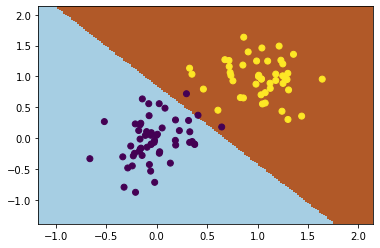

In [108]:
# Start with the data
X, y = gen_2d_classification_samples(100)

# Perform gradient descent, obtain theta
X1 = np.hstack([np.ones_like(y.reshape(-1,1)), X])
n,p = X1.shape
theta = grad_descent(X1, y, theta_init=np.random.randn(p) * 0.1)  
print(theta)

x_min, x_max = np.array((X[:, 0], X[:, 1]))[0, :].min() - .5, np.array((X[:, 0], X[:, 1]))[0, :].max() + .5
y_min, y_max = np.array((X[:, 0], X[:, 1]))[1, :].min() - .5, np.array((X[:, 0], X[:, 1]))[1, :].max() + .5
h = .02  # step size in the mesh
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.scatter(X[:,0], X[:,1], c=y);

Z = sigmoid(np.c_[np.ones_like(xx1.ravel()), xx1.ravel(), xx2.ravel()] @ theta)
Z.shape
plt.pcolormesh(xx1, xx2, (Z.reshape(xx1.shape) > 0.5) * 1, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y);

## How's your Confidence (5 points)

Intro: It's easy to feel confident when your model gets good accuracy but would you stake your grade on the predictions? 

Task: In the following, `ypred` represents a binary classification of 4 test points. Enter the indices (in `indices`) of the instances (in $\{0,1,2,3\}$) *in the order* that you feel most confident about wrt the unknown ground truth.

In [109]:
x = np.array([-0.3, 7, 0.5, 1.5])
X = np.vstack([np.ones_like(x), x]).T
yprob = 1. / (1. + np.exp(-X @ np.array([-1, 0.5])))
ypred = (yprob >= 0.5) * 1
indices = [1,4,2,0]
ypred

array([0, 1, 0, 0])

## Basis functions (2 points)

Intro: You should always design your own basis functions if you have a clear idea (e.g., prior/expert knowledge) as to what they should be. You are discussing with an expert who explains the following:
- Power consumed by a loudspeaker to output some music ($y$ in Watts) is a *linear function* of power getting out of the outlet (i.e., there is a fraction of power that is lost in the network, wires, transformed as heat in the electronics of the speaker, etc.). 
- Only measurements of acoustic pressure ($x$, in dB) are available in the data
- The power used to drive the speaker is exponential (let's say, $\exp$) wrt acoustic pressure (measured in dB).  

Task: Design an appropriate `phi` function to take into account the knowledge provided to you, such that *ordinary least squares (OLS)* can be considered as a suitable option (when applied on $\phi$-space).

Hint: Don't forget to add 1 for the intercept! i.e., `phi(x)[0] = 1`

In [49]:
def phi(x):
    ''' return phi(x) where x is brightness, measured in lux'''
    return np.vstack([np.ones_like(x), np.exp(x)]).T


## Biased Estimators (5 points).

Intro: In `lab_session_04` we looked at empirically demonstrating that OLS is an unbiased estimator. Let's now empirically measure the bias of ridge regression, in the sense of the "bias" term of the bias-variance decomposition of the expected squared error.

Task: Provide the empirical bias of ridge regression with regard to the `X, y` provided here (do not generate new data). Store the result in the variable `bias`.

Hint: Note that `theta_true[0] = 0`.

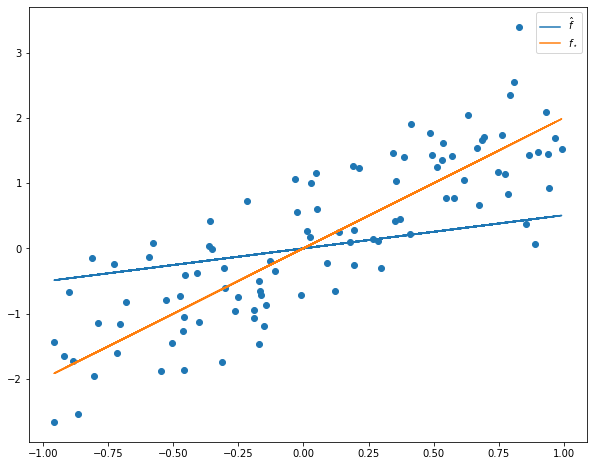

Bias:  0.036582609235388336


In [55]:
theta_true = np.array([0, 2])  # this is the true parameter
X, y = generate(1000, theta_true)  # this is y ~ N(X @ theta_true, sigma) 
x = X[:, 1].reshape(-1, 1)  # no intercept needed
ridge = Ridge(alpha=1000, fit_intercept=False).fit(x, y)
theta_est = ridge.coef_  # this is the estimated parameter

# Visual demo - note how both go through (0, 0)
x_plot = x[0:100]
y_plot = y[0:100]
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_plot, y_plot)
yt = x_plot * theta_true[1]
yp = x_plot * theta_est
ax.plot(x_plot, yp, label="$\hat f$")
ax.plot(x_plot, yt, label="$f_\star$")
plt.legend()
plt.show()

# Calculate the bias (defined as $\mathbb{E}[f-\hat F]$)
bias = np.mean((x * theta_true[1]) - (x * theta_est))
print("Bias: ", bias)

In [57]:
# change the following `bias` in its correct value
bias = 0.036582609235388336 

# Calculate the bias (defined as $\mathbb{E}[f-\hat F]$)
bias = np.mean((x * theta_true[1]) - (x * theta_est))
print("Bias: ", bias)

Bias:  0.036582609235388336


## Estimators with no variance (5 points).

Intro: OLS is an unbiased estimator. But can we have an estimator with *no variance*?

Task: Define `estimator` as an estimator which provides $\boldsymbol{\hat \theta}$ (from a given training set) but with **no variance** (or as low as you can get it).

Hint: In the sense of a theoretical analysis (bias-variance trade-off); accuracy is not a concern.

In [91]:
def estimator(X, y):
    '''
        Returns an estimate of theta, of shape (p,)
    '''
    n, p = X.shape
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [90]:
# Freshly generate a dataset
X, y = generate()
# Estimate some parameters
theta = estimator(X, y)
# Check for variance (hidden test not shown); it should be 0
print("Variance: ", np.var(X @ theta - y))

Variance:  0.22944608784709306


## Free-for-All (20 points)

Intro: Imagine, your boss comes to you with a dataset (this time, neatly prepared as `X`, and `y` for you). She additionally specifies that the sum of squares (RSS) loss defines the task well, but you incur infinite loss iff it takes more than 1 second to provide a prediction (for any given test point - this is more realistic than you think: would you use Google if it took more than a few microseconds?). Also: training must complete in less than 1 minute. The rest is up to you. 

Task: In the `fit_predict` function: instantiate, train, and parametrize *any method you've seen in the course so far*. You should expect Xtest to contain 100 test points (i.e., shape `(100, p)`). 

Hints: The more baselines you beat, the more points (beat all baselines = full points). You are free to use scikit-learn instantiations (or, implement yourself, as you wish). Performance will be evaluated on test data (not provided here, i.e., not `X`)! Normally, the time constraints should not play a role in your consideration (the 1 second/1 minute constraint is absurdly generous, even for a relatively standard implementation). 

In [138]:
baselines = [LinearRegression(), DummyRegressor(strategy='mean'),
             DummyRegressor(strategy='constant',constant=0), KNeighborsRegressor(n_neighbors=10)]

Xy = np.loadtxt('Xy.csv')
X = Xy[:, :-1]
y = Xy[:, -1]

In [33]:
for f in baselines:
    f.fit(X, y)
    ypred = f.predict(X)
    print("RSS Error: %10.2f obtained by method: %s" % (((y - ypred)**2).sum(), str(f)))

RSS Error:    2719.58 obtained by method: LinearRegression()
RSS Error:   49629.98 obtained by method: DummyRegressor()
RSS Error:   77347.90 obtained by method: DummyRegressor(constant=array(0), strategy='constant')
RSS Error:    4201.08 obtained by method: KNeighborsRegressor(n_neighbors=10)


In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
# Import polynomial features
from sklearn.preprocessing import PolynomialFeatures
def fit_predict(X,y,Xtest): 
    ''' 
        In this function: 
        
        1. fit a classifier on training data X,y; including any hyper-parameter tuning
        2. provide predictions ypred (of shape (n_test,1)), and return these 
        
        There are no other constraints except those stated in the task description above!
    '''
    # Add polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    Xtest_poly = poly.transform(Xtest)


    # Fit a classifier with L2 regularization
    # The Ridge estimator adds an L2 penalty term to the loss function of linear regression, which leads to smaller magnitude parameter estimates and helps reduce overfitting.
    #clf = Ridge(alpha=12)
    # I decided to use RidgeCV instead of normal L2 regularization since this includes cross-validation
    clf = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 20, 30, 40])

    clf.fit(X_poly, y)

    # Make predictions
    ypred = clf.predict(Xtest_poly)
    return ypred

In [169]:
ypred = fit_predict(X, y, X)
print("RSS Error: %10.2f obtained by method: %s" % (((y - ypred)**2).sum(), '***Your Method***'))

RSS Error:      33.52 obtained by method: ***Your Method***
